# IE30301 DataMining  Programming Final Project

## Supervised Learning (Regression): Prediction - the number of bike rentals

### Student ID: 20181321
### Student name: Kang Min Hyeok

### Preparation
#### import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
TEST_SIZE = 0.2
RANDOM_SEED = 0

### Data Munging

#### Load data

In [3]:
# Read dataframe as df
df = pd.read_csv('./regression_project.csv')

Check the first few rows of data using `head()` method

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


The given data has been subjected to feature engineering. Since things that were not expressed as numbers are expressed as numbers, conversion of additional feature values can be omitted.

In [5]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17382 entries, 0 to 17381
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17376 non-null  float64
 1   dteday      17376 non-null  object 
 2   season      17376 non-null  float64
 3   yr          17376 non-null  float64
 4   mnth        17376 non-null  float64
 5   hr          17376 non-null  float64
 6   holiday     17376 non-null  float64
 7   weekday     17376 non-null  float64
 8   workingday  17376 non-null  float64
 9   weathersit  17376 non-null  float64
 10  temp        17376 non-null  float64
 11  atemp       17376 non-null  float64
 12  hum         17376 non-null  float64
 13  windspeed   17376 non-null  float64
 14  casual      17376 non-null  float64
 15  registered  9999 non-null   float64
 16  cnt         17376 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [6]:
# Describe dataframe
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,17376.000000,9999.000000,17376.000000
mean,8690.026876,2.501784,0.502532,6.538214,11.543854,0.028775,3.004431,0.682666,1.425357,0.496994,0.475791,0.627337,0.190020,35.666034,116.692569,189.422364
std,5017.010872,1.106890,0.500008,3.438710,6.915858,0.167179,2.005871,0.465452,0.639388,0.192540,0.171822,0.192913,0.122341,49.287257,110.576429,181.384969
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.750000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,27.000000,40.000000
50%,8689.500000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,91.000000,142.000000
75%,13034.250000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,169.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,567.000000,977.000000


### Data Pre-processing

#### Cleanse data

#### missing value analysis

Looking at the dataframe info above, the number of registered feature data is 9999, which is less than other data. That is, the data is missing. However, since we know the number of casual users and the total count, subtract the number of casual users from the total count to get the number of registered users. We will fill in the missing data this way.

In [7]:
df['registered'].tail()

17377     NaN
17378     NaN
17379    13.0
17380    13.0
17381    13.0
Name: registered, dtype: float64

In [8]:
df['registered'] = df.apply(lambda x: x['cnt'] - x['casual'], axis = 1)
df['registered'].tail()

17377    48.0
17378    37.0
17379    13.0
17380    13.0
17381    13.0
Name: registered, dtype: float64

Through the above process, we can now check that the missing values ​​are filled in.

#### except above missing value, we should check null value.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17382 entries, 0 to 17381
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17376 non-null  float64
 1   dteday      17376 non-null  object 
 2   season      17376 non-null  float64
 3   yr          17376 non-null  float64
 4   mnth        17376 non-null  float64
 5   hr          17376 non-null  float64
 6   holiday     17376 non-null  float64
 7   weekday     17376 non-null  float64
 8   workingday  17376 non-null  float64
 9   weathersit  17376 non-null  float64
 10  temp        17376 non-null  float64
 11  atemp       17376 non-null  float64
 12  hum         17376 non-null  float64
 13  windspeed   17376 non-null  float64
 14  casual      17376 non-null  float64
 15  registered  17376 non-null  float64
 16  cnt         17376 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [10]:
df.shape

(17382, 17)

In [11]:
# Drop missing rows
df = df.dropna()

In [12]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17376 entries, 0 to 17381
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17376 non-null  float64
 1   dteday      17376 non-null  object 
 2   season      17376 non-null  float64
 3   yr          17376 non-null  float64
 4   mnth        17376 non-null  float64
 5   hr          17376 non-null  float64
 6   holiday     17376 non-null  float64
 7   weekday     17376 non-null  float64
 8   workingday  17376 non-null  float64
 9   weathersit  17376 non-null  float64
 10  temp        17376 non-null  float64
 11  atemp       17376 non-null  float64
 12  hum         17376 non-null  float64
 13  windspeed   17376 non-null  float64
 14  casual      17376 non-null  float64
 15  registered  17376 non-null  float64
 16  cnt         17376 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.4+ MB


In [13]:
df.shape

(17376, 17)

##### Drop duplicated samples

In [14]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17376 entries, 0 to 17381
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17376 non-null  float64
 1   dteday      17376 non-null  object 
 2   season      17376 non-null  float64
 3   yr          17376 non-null  float64
 4   mnth        17376 non-null  float64
 5   hr          17376 non-null  float64
 6   holiday     17376 non-null  float64
 7   weekday     17376 non-null  float64
 8   workingday  17376 non-null  float64
 9   weathersit  17376 non-null  float64
 10  temp        17376 non-null  float64
 11  atemp       17376 non-null  float64
 12  hum         17376 non-null  float64
 13  windspeed   17376 non-null  float64
 14  casual      17376 non-null  float64
 15  registered  17376 non-null  float64
 16  cnt         17376 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.4+ MB


In [15]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17377,17378.0,2012-12-31,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,17379.0,2012-12-31,1.0,1.0,12.0,23.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.65,0.1343,12.0,37.0,49.0
17379,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
17380,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0
17381,1.0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0


In [16]:
df.shape

(17376, 17)

In [17]:
df = df.drop_duplicates()
df.shape

(17373, 17)

In [18]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375.0,2012-12-31,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,8.0,81.0,89.0
17376,17377.0,2012-12-31,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,7.0,83.0,90.0
17377,17378.0,2012-12-31,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,17379.0,2012-12-31,1.0,1.0,12.0,23.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.65,0.1343,12.0,37.0,49.0


##### Drop unncessary columns

In [19]:
# Check what columns there are
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [20]:
# Drop columns
df = df.drop(columns=['instant', 'dteday', 'yr'], axis=1)

In [21]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17373 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17373 non-null  float64
 1   mnth        17373 non-null  float64
 2   hr          17373 non-null  float64
 3   holiday     17373 non-null  float64
 4   weekday     17373 non-null  float64
 5   workingday  17373 non-null  float64
 6   weathersit  17373 non-null  float64
 7   temp        17373 non-null  float64
 8   atemp       17373 non-null  float64
 9   hum         17373 non-null  float64
 10  windspeed   17373 non-null  float64
 11  casual      17373 non-null  float64
 12  registered  17373 non-null  float64
 13  cnt         17373 non-null  float64
dtypes: float64(14)
memory usage: 2.0 MB


#### Plot analysis

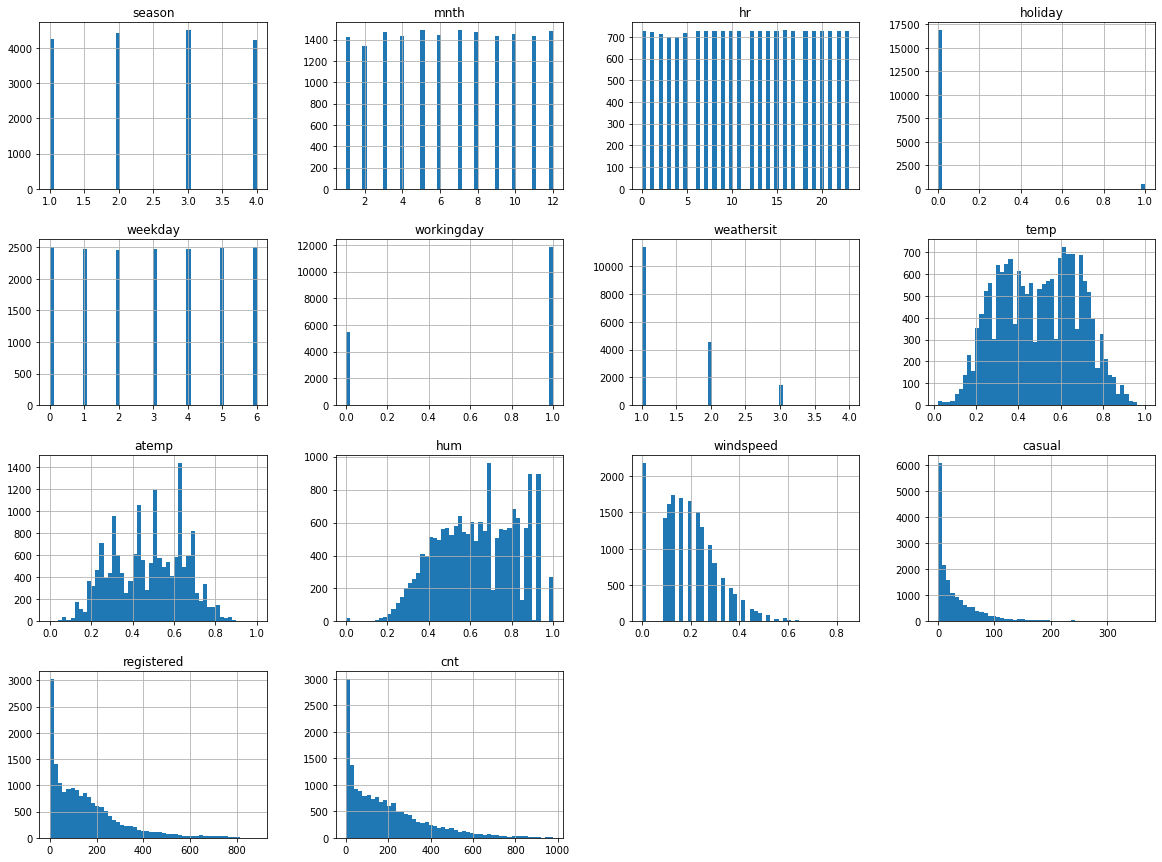

In [22]:
# Plot Histogram
df.hist(bins=50, figsize=(20, 15))
plt.show()

#### Split training and test data

In [23]:
# import method
from sklearn.model_selection import train_test_split

In [24]:
# set `random_state` for reproduciblity
training_set, test_set = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_SEED) 

In [25]:
TR_LENGTH = len(training_set)
TE_LENGTH = len(test_set)

print(f'Training samples: {TR_LENGTH}, Test samples: {TE_LENGTH}')

Training samples: 13898, Test samples: 3475


### Exploratory Data Analysis (EDA)

In [26]:
# copy data for preventing damage in raw training data
data_cp = training_set.copy()

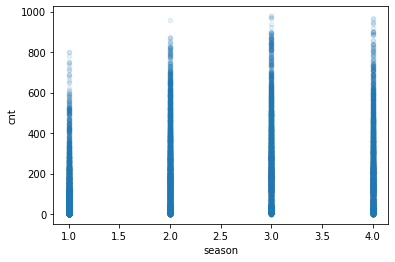

In [27]:
ax = data_cp.plot(kind='scatter', x='season', y='cnt', alpha=0.1)
ax.set(xlabel='season', ylabel='cnt')
plt.show() 


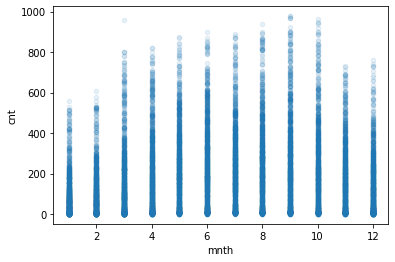

In [28]:
ax = data_cp.plot(kind='scatter', x='mnth', y='cnt', alpha=0.1)
ax.set(xlabel='mnth', ylabel='cnt')
plt.show() 

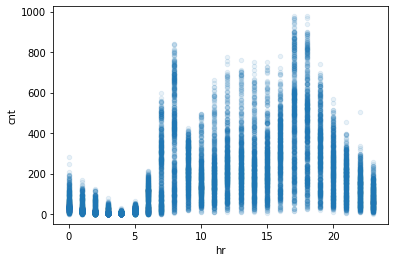

In [29]:
ax = data_cp.plot(kind='scatter', x='hr', y='cnt', alpha=0.1)
ax.set(xlabel='hr', ylabel='cnt')
plt.show() 

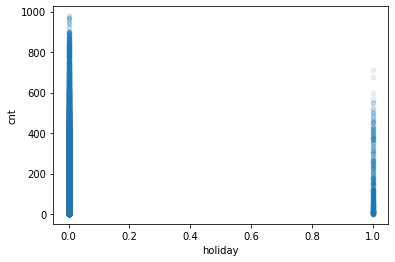

In [30]:
ax = data_cp.plot(kind='scatter', x='holiday', y='cnt', alpha=0.1)
ax.set(xlabel='holiday', ylabel='cnt')
plt.show() 

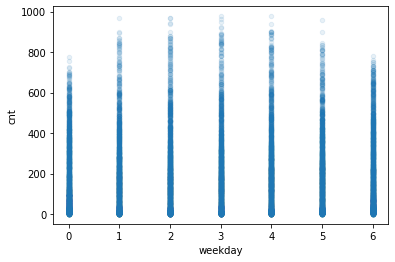

In [31]:
ax = data_cp.plot(kind='scatter', x='weekday', y='cnt', alpha=0.1)
ax.set(xlabel='weekday', ylabel='cnt')
plt.show() 

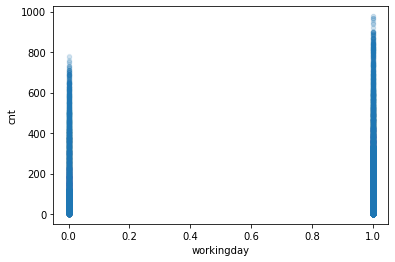

In [32]:
ax = data_cp.plot(kind='scatter', x='workingday', y='cnt', alpha=0.1)
ax.set(xlabel='workingday', ylabel='cnt')
plt.show() 

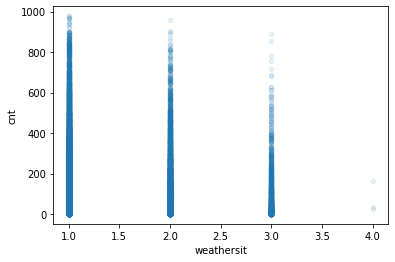

In [33]:
ax = data_cp.plot(kind='scatter', x='weathersit', y='cnt', alpha=0.1)
ax.set(xlabel='weathersit', ylabel='cnt')
plt.show() 

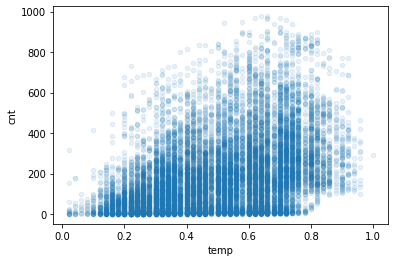

In [34]:
ax = data_cp.plot(kind='scatter', x='temp', y='cnt', alpha=0.1)
ax.set(xlabel='temp', ylabel='cnt')
plt.show() 

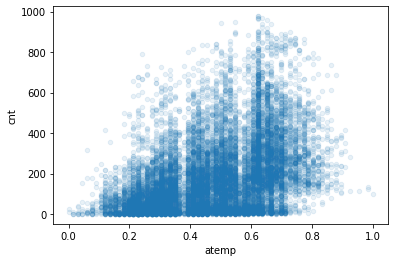

In [35]:
ax = data_cp.plot(kind='scatter', x='atemp', y='cnt', alpha=0.1)
ax.set(xlabel='atemp', ylabel='cnt')
plt.show() 

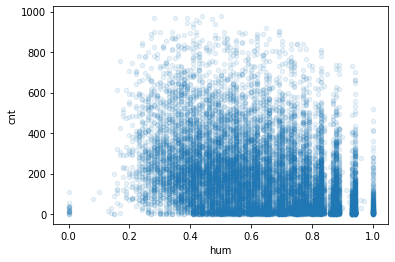

In [36]:
ax = data_cp.plot(kind='scatter', x='hum', y='cnt', alpha=0.1)
ax.set(xlabel='hum', ylabel='cnt')
plt.show() 

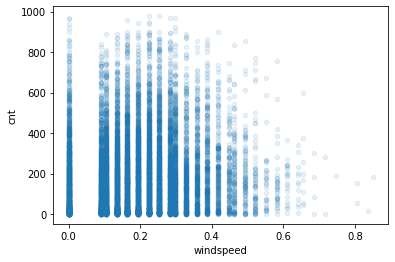

In [37]:
ax = data_cp.plot(kind='scatter', x='windspeed', y='cnt', alpha=0.1)
ax.set(xlabel='windspeed', ylabel='cnt')
plt.show() 

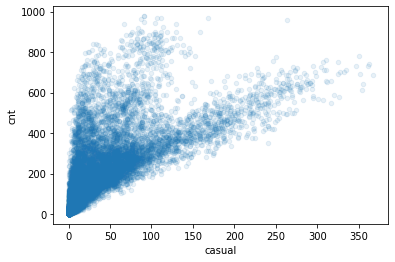

In [38]:
ax = data_cp.plot(kind='scatter', x='casual', y='cnt', alpha=0.1)
ax.set(xlabel='casual', ylabel='cnt')
plt.show() 

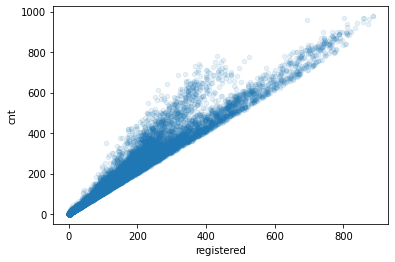

In [39]:
ax = data_cp.plot(kind='scatter', x='registered', y='cnt', alpha=0.1)
ax.set(xlabel='registered', ylabel='cnt')
plt.show() 

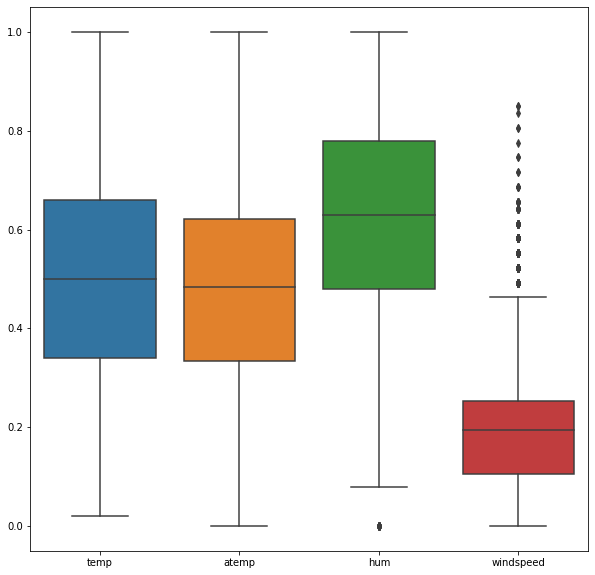

In [40]:
sn.boxplot(data=df[['temp',
       'atemp', 'hum', 'windspeed']])
fig=plt.gcf()
fig.set_size_inches(10,10)

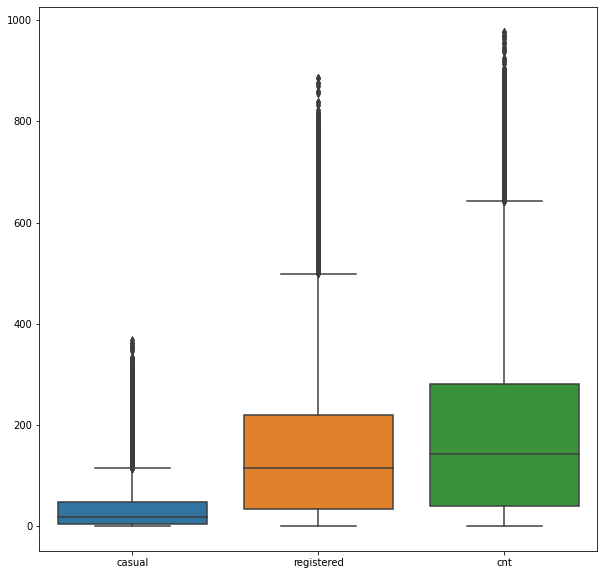

In [41]:
sn.boxplot(data=df[['casual', 'registered', 'cnt']])
fig=plt.gcf()
fig.set_size_inches(10,10)

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

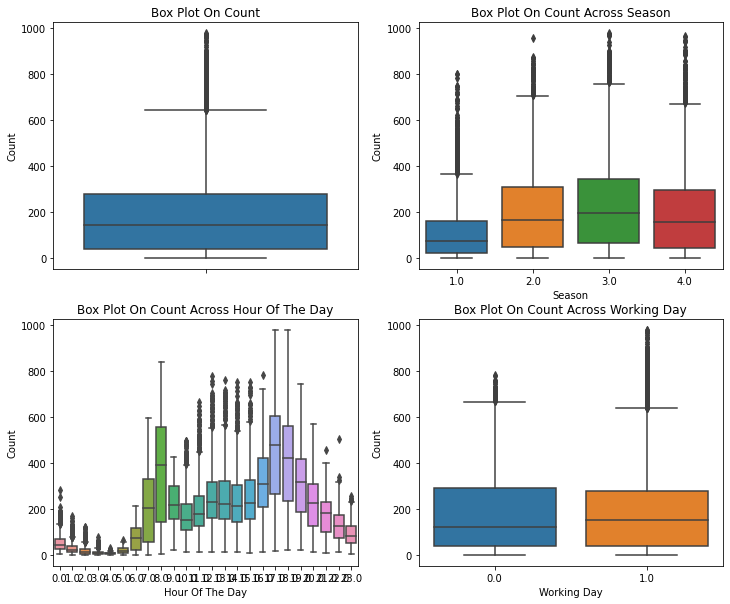

In [42]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=data_cp,y="cnt",orient="v",ax=axes[0][0])
sn.boxplot(data=data_cp,y="cnt",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=data_cp,y="cnt",x="hr",orient="v",ax=axes[1][0])
sn.boxplot(data=data_cp,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

#### Correlation Analysis

<AxesSubplot:>

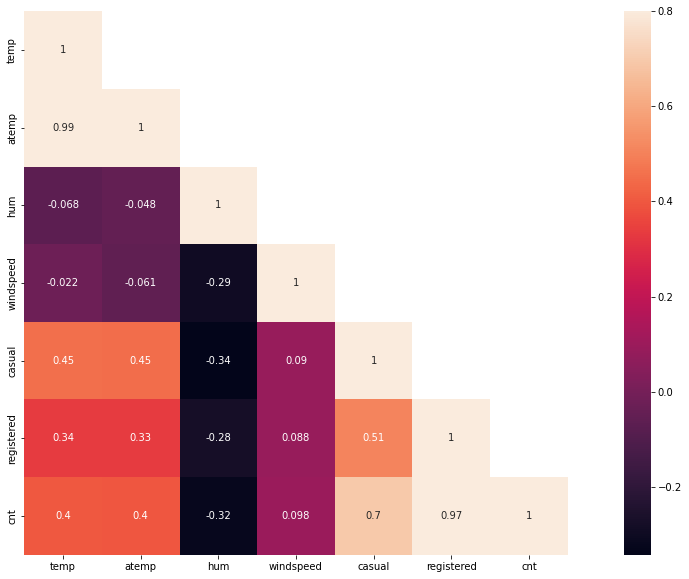

In [43]:
corrMatt = data_cp[["temp","atemp","hum","windspeed","casual","registered","cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [44]:
# Describe dataframe
data_cp.describe()

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,13898.000000,13898.000000,13898.000000,13898.000000,13898.000000,13898.000000,13898.000000,13898.000000,13898.000000,13898.000000,13898.000000,13898.000000,13898.000000,13898.000000
mean,2.495467,6.522737,11.533746,0.028205,3.021586,0.685998,1.420636,0.497945,0.476654,0.625743,0.189967,35.644625,154.218737,189.863362
std,1.106875,3.433444,6.922232,0.165565,1.998516,0.464134,0.636321,0.192591,0.171849,0.192961,0.123041,49.084606,151.797027,181.760407
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.470000,0.104500,4.000000,33.000000,39.000000
50%,2.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.620000,0.194000,17.000000,116.000000,144.000000
75%,3.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,49.000000,221.000000,281.000000
max,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

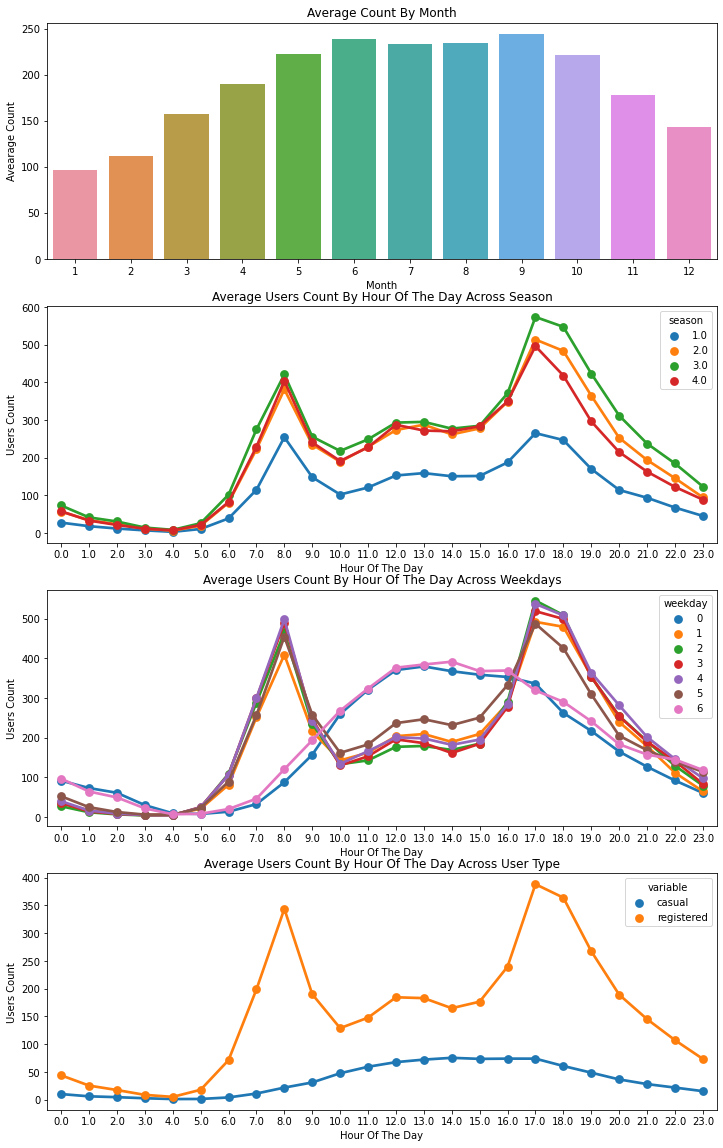

In [45]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(12,20)
sortOrder = [1,2,3,4,5,6,7,8,9,10,11,12]
hueOrder = [0,1,2,3,4,5,6]
monthAggregated = pd.DataFrame(data_cp.groupby("mnth")["cnt"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="cnt",ascending=False)
sn.barplot(data=monthSorted,x="mnth",y="cnt",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(data_cp.groupby(["hr","season"],sort=True)["cnt"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(data_cp.groupby(["hr","weekday"],sort=True)["cnt"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hr"], y=hourAggregated["cnt"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(data_cp[["hr","casual","registered"]], id_vars=['hr'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hr","variable"],sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hr"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

#### outlier Analysis and split x & y

In [46]:
print(training_set.shape)
training_set = training_set[np.abs(training_set["cnt"]-training_set["cnt"].mean())<=(3*training_set["cnt"].std())] 
print(training_set.shape)

(13898, 14)
(13702, 14)


[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

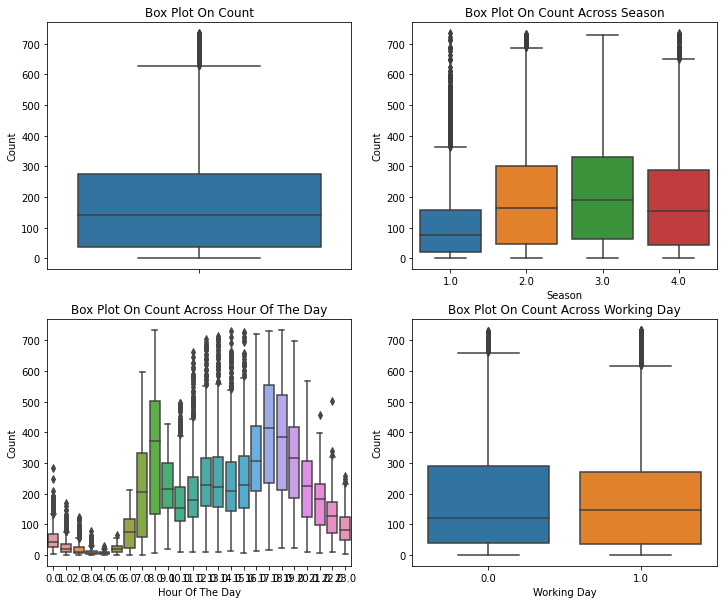

In [47]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=training_set,y="cnt",orient="v",ax=axes[0][0])
sn.boxplot(data=training_set,y="cnt",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=training_set,y="cnt",x="hr",orient="v",ax=axes[1][0])
sn.boxplot(data=training_set,y="cnt",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

In [48]:
X_train, y_train = training_set.iloc[:, :-1], training_set.iloc[:, -1]
X_test, y_test = test_set.iloc[:, :-1], test_set.iloc[:, -1]

#### Scale data
casual and registered user are dropped in prediction model, because actually it is target value, if insert these, then it is cheating.

In [49]:
X_train_cat = X_train[['season', 'mnth', 'hr', 'holiday','weekday','workingday','weathersit']]
X_test_cat = X_test[['season', 'mnth', 'hr', 'holiday','weekday','workingday','weathersit']]
X_train_scale_target = X_train[['temp', 'atemp', 'hum', 'windspeed']]
X_test_scale_target = X_test[['temp', 'atemp', 'hum', 'windspeed']]

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_scale_target)
X_train_scale_target_std =  scaler.transform(X_train_scale_target)
X_test_scale_target_std = scaler.transform(X_test_scale_target)

In [51]:
# Check shape
X_train_scale_target_std.shape

(13702, 4)

In [52]:
X_train_std = np.concatenate([X_train_cat,X_train_scale_target_std],axis=1)
X_test_std = np.concatenate([X_test_cat,X_test_scale_target_std],axis=1)

In [53]:
X_train_std.shape

(13702, 11)

In [54]:
X_test_std.shape

(3475, 11)

## Load model and train the model - simple Linear Regression

In [55]:
# season
X_train_season = X_train_std[:, 0].reshape((-1,1))
X_test_season = X_test_std[:, 0].reshape((-1,1))
print("season")
print(X_train_season)


# mnth
X_train_mnth = X_train_std[:, 1].reshape((-1,1))
X_test_mnth = X_test_std[:, 1].reshape((-1,1))
print("mnth")
print(X_train_mnth)

# hr
X_train_hr = X_train_std[:, 2].reshape((-1,1))
X_test_hr = X_test_std[:, 2].reshape((-1,1))
print("hr")
print(X_train_hr)

# holiday
X_train_holiday = X_train_std[:, 3].reshape((-1,1))
X_test_holiday = X_test_std[:, 3].reshape((-1,1))
print("holiday")
print(X_train_holiday)

# weekday
X_train_weekday = X_train_std[:, 4].reshape((-1,1))
X_test_weekday = X_test_std[:, 4].reshape((-1,1))
print("weekday")
print(X_train_weekday)

# workingday
X_train_workingday = X_train_std[:, 5].reshape((-1,1))
X_test_workingday = X_test_std[:, 5].reshape((-1,1))
print("workingday")
print(X_train_workingday)

# weathersit
X_train_weathersit = X_train_std[:, 6].reshape((-1,1))
X_test_weathersit = X_test_std[:, 6].reshape((-1,1))
print("weathersit")
print(X_train_weathersit)

# temp
X_train_temp = X_train_std[:, 7].reshape((-1,1))
X_test_temp = X_test_std[:, 7].reshape((-1,1))
print("temp")
print(X_train_temp)

# atemp
X_train_atemp = X_train_std[:, 8].reshape((-1,1))
X_test_atemp = X_test_std[:, 8].reshape((-1,1))
print("atemp")
print(X_train_atemp)

# hum
X_train_hum = X_train_std[:, 9].reshape((-1,1))
X_test_hum = X_test_std[:, 9].reshape((-1,1))
print("hum")
print(X_train_hum)

# windspeed
X_train_windspeed = X_train_std[:, 10].reshape((-1,1))
X_test_windspeed = X_test_std[:, 10].reshape((-1,1))
print("windspeed")
print(X_train_windspeed)

season
[[3.]
 [2.]
 [3.]
 ...
 [1.]
 [2.]
 [2.]]
mnth
[[8.]
 [6.]
 [8.]
 ...
 [2.]
 [3.]
 [4.]]
hr
[[16.]
 [ 8.]
 [17.]
 ...
 [ 9.]
 [ 7.]
 [22.]]
holiday
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
weekday
[[4.]
 [5.]
 [5.]
 ...
 [1.]
 [6.]
 [4.]]
workingday
[[1.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]
weathersit
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [2.]
 [1.]]
temp
[[ 1.68835849]
 [ 1.27231691]
 [ 1.68835849]
 ...
 [-1.53596375]
 [-0.70388059]
 [ 0.23221296]]
atemp
[[ 1.64963229]
 [ 1.2080985 ]
 [ 1.38459552]
 ...
 [-1.70439352]
 [-0.73336868]
 [ 0.23765616]]
hum
[[-0.86810971]
 [-0.24610313]
 [-1.90478735]
 ...
 [-0.19426924]
 [ 1.25707945]
 [-0.91994359]]
windspeed
[[ 0.03468974]
 [-0.45013635]
 [-1.54079203]
 ...
 [ 1.36816451]
 [-0.20731726]
 [-0.20731726]]


coefficient:  [25.93628598]
intercept:  116.2910996883953
score:  0.02990567646672493
MAE: 136.5124, MSE: 31386.1822, RMSE: 177.1615


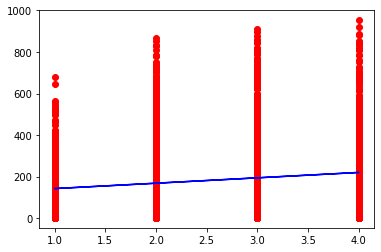

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# season
SLR = LinearRegression()
SLR.fit(X_train_season,y_train)

print("coefficient: ", SLR.coef_)
print("intercept: ", SLR.intercept_)
print("score: ", SLR.score(X_train_season, y_train))

y_prediction =  np.array(SLR.predict(X_test_season))
y_test = np.array(y_test)

SLR_mse = mean_squared_error(y_test, y_prediction)
SLR_mae = mean_absolute_error(y_test, y_prediction)

print(f'MAE: {SLR_mae:.4f}, MSE: {SLR_mse:.4f}, RMSE: {np.sqrt(SLR_mse):.4f}')

plt.plot(X_test_season, y_test, "ro")
plt.plot(X_test_season, y_prediction, "b")

plt.show()

coefficient:  [5.4896186]
intercept:  145.1166337564521
score:  0.012929630911166279
MAE: 138.2415, MSE: 31900.1891, RMSE: 178.6062


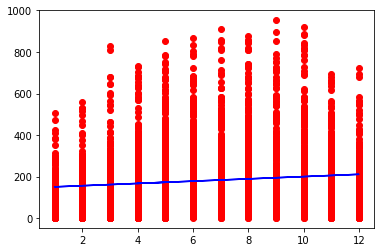

In [57]:
# mnth
SLR = LinearRegression()
SLR.fit(X_train_mnth,y_train)

print("coefficient: ", SLR.coef_)
print("intercept: ", SLR.intercept_)
print("score: ", SLR.score(X_train_mnth, y_train))

y_prediction =  np.array(SLR.predict(X_test_mnth))
y_test = np.array(y_test)

SLR_mse = mean_squared_error(y_test, y_prediction)
SLR_mae = mean_absolute_error(y_test, y_prediction)

print(f'MAE: {SLR_mae:.4f}, MSE: {SLR_mse:.4f}, RMSE: {np.sqrt(SLR_mse):.4f}')

plt.plot(X_test_mnth, y_test, "ro")
plt.plot(X_test_mnth, y_prediction, "b")

plt.show()

coefficient:  [9.75009105]
intercept:  68.99344544066962
score:  0.16535562909053358
MAE: 124.3744, MSE: 27943.6656, RMSE: 167.1636


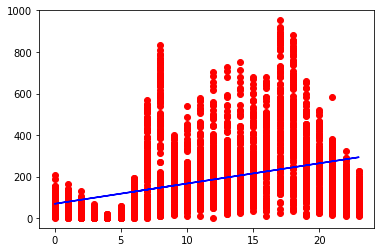

In [58]:
# hr
SLR = LinearRegression()
SLR.fit(X_train_hr,y_train)

print("coefficient: ", SLR.coef_)
print("intercept: ", SLR.intercept_)
print("score: ", SLR.score(X_train_hr, y_train))

y_prediction =  np.array(SLR.predict(X_test_hr))
y_test = np.array(y_test)

SLR_mse = mean_squared_error(y_test, y_prediction)
SLR_mae = mean_absolute_error(y_test, y_prediction)

print(f'MAE: {SLR_mae:.4f}, MSE: {SLR_mse:.4f}, RMSE: {np.sqrt(SLR_mse):.4f}')

plt.plot(X_test_hr, y_test, "ro")
plt.plot(X_test_hr, y_prediction, "b")

plt.show()

coefficient:  [-27.76541039]
intercept:  181.63275732531932
score:  0.0007738777199081115
MAE: 139.6110, MSE: 32392.4973, RMSE: 179.9792


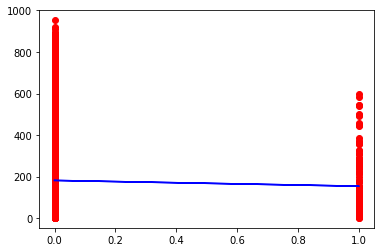

In [59]:
# holiday
SLR = LinearRegression()
SLR.fit(X_train_holiday,y_train)

print("coefficient: ", SLR.coef_)
print("intercept: ", SLR.intercept_)
print("score: ", SLR.score(X_train_holiday, y_train))

y_prediction =  np.array(SLR.predict(X_test_holiday))
y_test = np.array(y_test)

SLR_mse = mean_squared_error(y_test, y_prediction)
SLR_mae = mean_absolute_error(y_test, y_prediction)

print(f'MAE: {SLR_mae:.4f}, MSE: {SLR_mse:.4f}, RMSE: {np.sqrt(SLR_mse):.4f}')

plt.plot(X_test_holiday, y_test, "ro")
plt.plot(X_test_holiday, y_prediction, "b")

plt.show()

coefficient:  [2.69896586]
intercept:  172.68223038899256
score:  0.001058654048672114
MAE: 139.5447, MSE: 32398.2391, RMSE: 179.9951


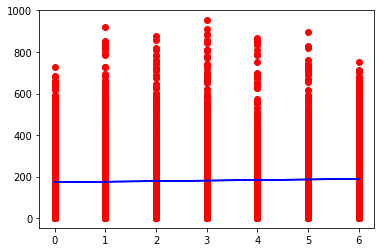

In [60]:
# weekday
SLR = LinearRegression()
SLR.fit(X_train_weekday,y_train)

print("coefficient: ", SLR.coef_)
print("intercept: ", SLR.intercept_)
print("score: ", SLR.score(X_train_weekday, y_train))

y_prediction =  np.array(SLR.predict(X_test_weekday))
y_test = np.array(y_test)

SLR_mse = mean_squared_error(y_test, y_prediction)
SLR_mae = mean_absolute_error(y_test, y_prediction)

print(f'MAE: {SLR_mae:.4f}, MSE: {SLR_mse:.4f}, RMSE: {np.sqrt(SLR_mse):.4f}')

plt.plot(X_test_weekday, y_test, "ro")
plt.plot(X_test_weekday, y_prediction, "b")

plt.show()

coefficient:  [0.12148079]
intercept:  180.7555657562543
score:  1.156064663998535e-07
MAE: 139.6619, MSE: 32402.3050, RMSE: 180.0064


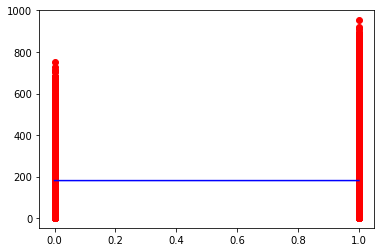

In [61]:
# workingday
SLR = LinearRegression()
SLR.fit(X_train_workingday,y_train)

print("coefficient: ", SLR.coef_)
print("intercept: ", SLR.intercept_)
print("score: ", SLR.score(X_train_workingday, y_train))

y_prediction =  np.array(SLR.predict(X_test_workingday))
y_test = np.array(y_test)

SLR_mse = mean_squared_error(y_test, y_prediction)
SLR_mae = mean_absolute_error(y_test, y_prediction)

print(f'MAE: {SLR_mae:.4f}, MSE: {SLR_mse:.4f}, RMSE: {np.sqrt(SLR_mse):.4f}')

plt.plot(X_test_workingday, y_test, "ro")
plt.plot(X_test_workingday, y_prediction, "b")

plt.show()

coefficient:  [-36.48917932]
intercept:  232.79462038128344
score:  0.019579382355007335
MAE: 137.4607, MSE: 31833.4746, RMSE: 178.4194


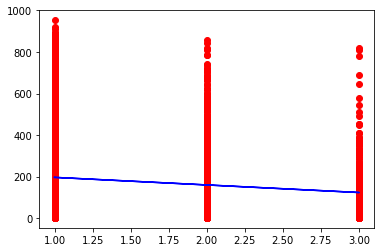

In [62]:
# weathersit
SLR = LinearRegression()
SLR.fit(X_train_weathersit,y_train)

print("coefficient: ", SLR.coef_)
print("intercept: ", SLR.intercept_)
print("score: ", SLR.score(X_train_weathersit, y_train))

y_prediction =  np.array(SLR.predict(X_test_weathersit))
y_test = np.array(y_test)

SLR_mse = mean_squared_error(y_test, y_prediction)
SLR_mae = mean_absolute_error(y_test, y_prediction)

print(f'MAE: {SLR_mae:.4f}, MSE: {SLR_mse:.4f}, RMSE: {np.sqrt(SLR_mse):.4f}')

plt.plot(X_test_weathersit, y_test, "ro")
plt.plot(X_test_weathersit, y_prediction, "b")

plt.show()

coefficient:  [65.64905837]
intercept:  180.83841774923368
score:  0.15567717994474162
MAE: 122.4870, MSE: 26976.8923, RMSE: 164.2464


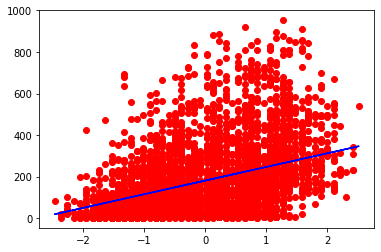

In [63]:
# temp
SLR = LinearRegression()
SLR.fit(X_train_temp,y_train)

print("coefficient: ", SLR.coef_)
print("intercept: ", SLR.intercept_)
print("score: ", SLR.score(X_train_temp, y_train))

y_prediction =  np.array(SLR.predict(X_test_temp))
y_test = np.array(y_test)

SLR_mse = mean_squared_error(y_test, y_prediction)
SLR_mae = mean_absolute_error(y_test, y_prediction)

print(f'MAE: {SLR_mae:.4f}, MSE: {SLR_mse:.4f}, RMSE: {np.sqrt(SLR_mse):.4f}')

plt.plot(X_test_temp, y_test, "ro")
plt.plot(X_test_temp, y_prediction, "b")

plt.show()

coefficient:  [65.04546973]
intercept:  180.83841774923368
score:  0.15282769467572588
MAE: 122.6763, MSE: 27023.0725, RMSE: 164.3870


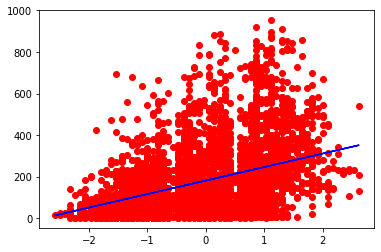

In [64]:
# atemp
SLR = LinearRegression()
SLR.fit(X_train_atemp,y_train)

print("coefficient: ", SLR.coef_)
print("intercept: ", SLR.intercept_)
print("score: ", SLR.score(X_train_atemp, y_train))

y_prediction =  np.array(SLR.predict(X_test_atemp))
y_test = np.array(y_test)

SLR_mse = mean_squared_error(y_test, y_prediction)
SLR_mae = mean_absolute_error(y_test, y_prediction)

print(f'MAE: {SLR_mae:.4f}, MSE: {SLR_mse:.4f}, RMSE: {np.sqrt(SLR_mse):.4f}')

plt.plot(X_test_atemp, y_test, "ro")
plt.plot(X_test_atemp, y_prediction, "b")

plt.show()

coefficient:  [-53.94041403]
intercept:  180.83841774923368
score:  0.10509849684457395
MAE: 128.4986, MSE: 29182.8700, RMSE: 170.8299


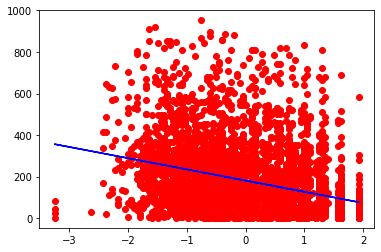

In [65]:
# hum
SLR = LinearRegression()
SLR.fit(X_train_hum,y_train)

print("coefficient: ", SLR.coef_)
print("intercept: ", SLR.intercept_)
print("score: ", SLR.score(X_train_hum, y_train))

y_prediction =  np.array(SLR.predict(X_test_hum))
y_test = np.array(y_test)

SLR_mse = mean_squared_error(y_test, y_prediction)
SLR_mae = mean_absolute_error(y_test, y_prediction)

print(f'MAE: {SLR_mae:.4f}, MSE: {SLR_mse:.4f}, RMSE: {np.sqrt(SLR_mse):.4f}')

plt.plot(X_test_hum, y_test, "ro")
plt.plot(X_test_hum, y_prediction, "b")

plt.show()

coefficient:  [16.78540525]
intercept:  180.83841774923368
score:  0.010177277466343337
MAE: 139.1611, MSE: 32238.6426, RMSE: 179.5512


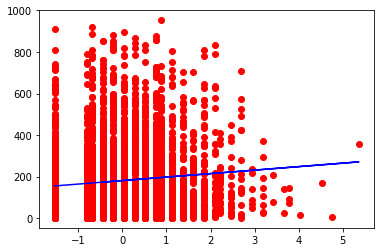

In [66]:
# windspeed
SLR = LinearRegression()
SLR.fit(X_train_windspeed,y_train)

print("coefficient: ", SLR.coef_)
print("intercept: ", SLR.intercept_)
print("score: ", SLR.score(X_train_windspeed, y_train))

y_prediction =  np.array(SLR.predict(X_test_windspeed))
y_test = np.array(y_test)

SLR_mse = mean_squared_error(y_test, y_prediction)
SLR_mae = mean_absolute_error(y_test, y_prediction)

print(f'MAE: {SLR_mae:.4f}, MSE: {SLR_mse:.4f}, RMSE: {np.sqrt(SLR_mse):.4f}')

plt.plot(X_test_windspeed, y_test, "ro")
plt.plot(X_test_windspeed, y_prediction, "b")

plt.show()

## Load model and train the model - Multiple Linear Regression

In [67]:
MLR = LinearRegression()
MLR.fit(X_train_std,y_train)
print("coefficient: ", MLR.coef_)
print("intercept: ", MLR.intercept_)

coefficient:  [ 1.70454787e+01 -4.47967974e-03  7.17822976e+00 -2.05888076e+01
  2.21848393e+00 -5.94138559e+00  4.14172425e-01  1.14045812e+01
  4.00814980e+01 -3.99906009e+01  3.62976442e+00]
intercept:  53.45121755344722


In [68]:
# Calculate score
MLR.score(X_train_std, y_train)

0.3439352719441101

In [69]:
y_pred_train = MLR.predict(X_train_std)

MLR_mse = mean_squared_error(y_train, y_pred_train)
MLR_mae = mean_absolute_error(y_train, y_pred_train)

print(f'MAE: {MLR_mae:.4f}, MSE: {MLR_mse:.4f}, RMSE: {np.sqrt(MLR_mse):.4f}')

MAE: 100.8656, MSE: 18162.6300, RMSE: 134.7688


#### Internal evaluation

Scores: [137.05244353 137.65922877 134.42153501 142.87681944 136.40252996
 130.78020622 134.25408078 133.89737514 129.91739533 131.00689729],
Mean: 134.8269,
Std: 3.6971


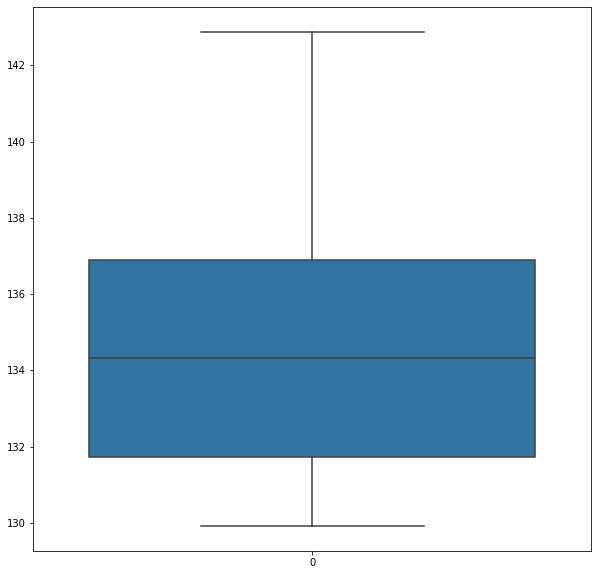

In [70]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X_train_std, y_train, scoring='neg_mean_squared_error', cv=10)
MLR_rmse_cv_scores = np.sqrt(-scores)
print(f'Scores: {MLR_rmse_cv_scores},\nMean: {np.mean(MLR_rmse_cv_scores):.4f},\nStd: {np.std(MLR_rmse_cv_scores):.4f}')

sn.boxplot(data=MLR_rmse_cv_scores)
fig=plt.gcf()
fig.set_size_inches(10,10)

#### External evaluation

In [71]:
y_pred_test = MLR.predict(X_test_std)

MLR_mse = mean_squared_error(y_test, y_pred_test)
MLR_mae = mean_absolute_error(y_test, y_pred_test)

print(f'MAE: {MLR_mae:.4f}, MSE: {MLR_mse:.4f}, RMSE: {np.sqrt(MLR_mse):.4f}')

MAE: 105.5900, MSE: 21846.9799, RMSE: 147.8072


In [72]:
MLR.score(X_test_std, y_test)

0.3247586481326067

## Load model and train the model - Random Forest Regression

In [73]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()

##### parameter tuning

In [74]:
params = {
    'n_estimators':(100, 500),
    'max_depth' : (5, 20),
}

In [75]:
from sklearn.model_selection import GridSearchCV
RFR_opt = GridSearchCV(RFR, param_grid=params, cv=3, refit=True)

In [76]:
RFR_opt.fit(X_train_std,y_train)
print('best parameters : ', RFR_opt.best_params_)
print('best score : ', RFR_opt.best_score_)

best parameters :  {'max_depth': 20, 'n_estimators': 500}
best score :  0.8509997771309997


#### model generation

In [77]:
RFR = RandomForestRegressor(n_estimators = 500, max_depth = 20)
RFR.fit(X_train_std,y_train)

RandomForestRegressor(max_depth=20, n_estimators=500)

In [78]:
# Calculate score
RFR.score(X_train_std, y_train)

0.977092448562447

In [79]:
y_pred_train = RFR.predict(X_train_std)

RFR_mse = mean_squared_error(y_train, y_pred_train)
RFR_mae = mean_absolute_error(y_train, y_pred_train)

print(f'MAE: {RFR_mae:.4f}, MSE: {RFR_mse:.4f}, RMSE: {np.sqrt(RFR_mse):.4f}')

MAE: 16.5562, MSE: 634.1773, RMSE: 25.1829


#### Internal evaluation

Scores: [64.42034053 62.89251816 64.2823995  64.74232646 64.65341894 62.01595802
 64.55504428 61.68667874 60.82955265 62.11085488],
Mean: 63.2189,
Std: 1.3992


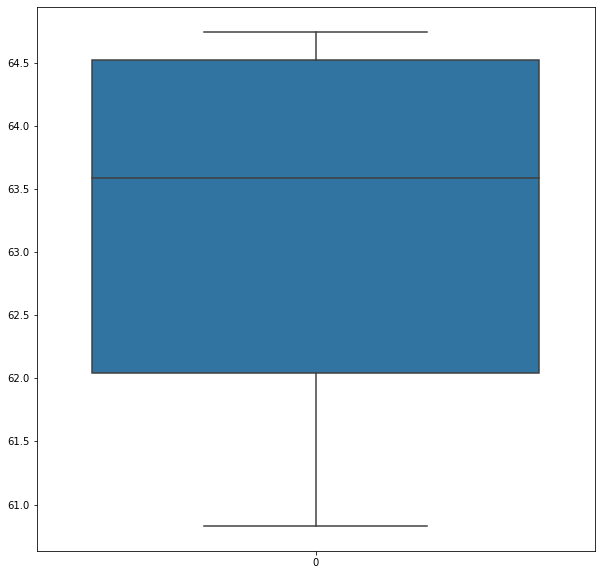

In [80]:
scores = cross_val_score(RFR, X_train_std, y_train, scoring='neg_mean_squared_error', cv=10)
RFR_rmse_cv_scores = np.sqrt(-scores)
print(f'Scores: {RFR_rmse_cv_scores},\nMean: {np.mean(RFR_rmse_cv_scores):.4f},\nStd: {np.std(RFR_rmse_cv_scores):.4f}')

sn.boxplot(data=RFR_rmse_cv_scores)
fig=plt.gcf()
fig.set_size_inches(10,10)

#### External evaluation

In [81]:
y_pred_test = RFR.predict(X_test_std)

RFR_mse = mean_squared_error(y_test, y_pred_test)
RFR_mae = mean_absolute_error(y_test, y_pred_test)

print(f'MAE: {RFR_mae:.4f}, MSE: {RFR_mse:.4f}, RMSE: {np.sqrt(RFR_mse):.4f}')

MAE: 43.8353, MSE: 4779.5917, RMSE: 69.1346


In [82]:
RFR.score(X_test_std, y_test)

0.852273497006082

#### Gradient Boost

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=RANDOM_SEED)

##### parameter tuning

In [84]:
params = {
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate' : (0.1, 0.0001),
    'n_estimators':(100, 500),
}

In [85]:
from sklearn.model_selection import GridSearchCV
GBR_opt = GridSearchCV(GBR, param_grid=params, cv=3, refit=True)

In [86]:
GBR_opt.fit(X_train_std,y_train)
print('best parameters : ', GBR_opt.best_params_)
print('best score : ', GBR_opt.best_score_)

best parameters :  {'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 500}
best score :  0.8382668079156531


#### model generation

In [87]:
GBR = GradientBoostingRegressor(loss = 'squared_error', learning_rate = 0.1,n_estimators = 500)
GBR.fit(X_train_std,y_train)

GradientBoostingRegressor(n_estimators=500)

#### Internal evaluation

In [88]:
# Calculate score
GBR.score(X_train_std, y_train)

0.8597231802717618

In [89]:
y_pred_train = GBR.predict(X_train_std)

GBR_mse = mean_squared_error(y_train, y_pred_train)
GBR_mae = mean_absolute_error(y_train, y_pred_train)

print(f'MAE: {GBR_mae:.4f}, MSE: {GBR_mse:.4f}, RMSE: {np.sqrt(GBR_mse):.4f}')

MAE: 43.5740, MSE: 3883.4521, RMSE: 62.3174


Scores: [66.94548493 66.46940963 66.42244772 69.63526522 66.16277531 65.61509478
 67.65862309 65.41350275 62.33934581 64.49991394],
Mean: 66.1162,
Std: 1.8246


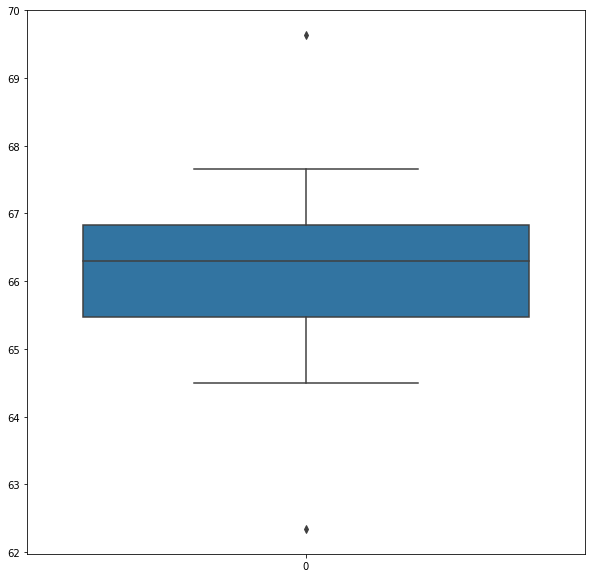

In [90]:
scores = cross_val_score(GBR, X_train_std, y_train, scoring='neg_mean_squared_error', cv=10)
GBR_rmse_cv_scores = np.sqrt(-scores)
print(f'Scores: {GBR_rmse_cv_scores},\nMean: {np.mean(GBR_rmse_cv_scores):.4f},\nStd: {np.std(GBR_rmse_cv_scores):.4f}')

sn.boxplot(data=GBR_rmse_cv_scores)
fig=plt.gcf()
fig.set_size_inches(10,10)

#### External evaluation

In [91]:
y_pred_test = GBR.predict(X_test_std)

GBR_mse = mean_squared_error(y_test, y_pred_test)
GBR_mae = mean_absolute_error(y_test, y_pred_test)

print(f'MAE: {GBR_mae:.4f}, MSE: {GBR_mse:.4f}, RMSE: {np.sqrt(GBR_mse):.4f}')

MAE: 49.8773, MSE: 5496.1106, RMSE: 74.1358


In [92]:
GBR.score(X_test_std, y_test)

0.8301274979521774